In [1]:
# this is to view the notebook in full with on my screen

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))



In [2]:
import pandas as pd


In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
import copy

In [8]:
from scipy.stats import ttest_ind

In [9]:
from statsmodels.stats.proportion import proportions_ztest

In [10]:
from statsmodels.formula.api import ols

In [11]:
df = pd.read_csv("Health_insurance.csv")

In [12]:
import statsmodels.api as sm

In [13]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [14]:
df.shape

(1338, 7)

In [15]:
print("Number of rows = {} and number of columns = {} in Insurance data frame".format(df.shape[0], df.shape[1]))


Number of rows = 1338 and number of columns = 7 in Insurance data frame


In [16]:
print("Data type of each attribute in Insurance data frame")

df.dtypes

Data type of each attribute in Insurance data frame


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [17]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [18]:
print("Five point summary of numerical attributes")

df.describe().T

Five point summary of numerical attributes


,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


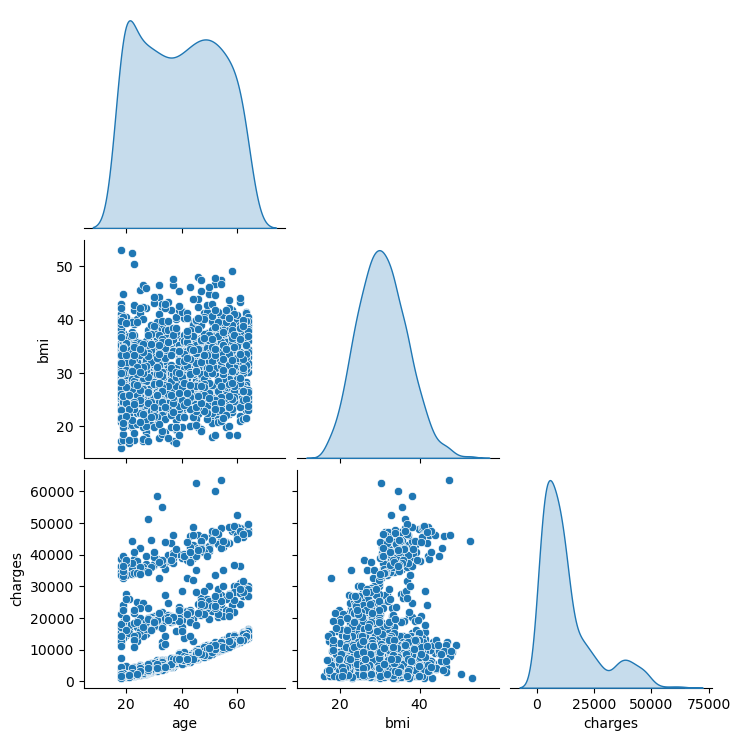

In [19]:
df_attr = df.iloc[:, [0,2,6]] # Select ‘age’, ‘bmi’ and ‘charges’ columns.

sns.pairplot(df_attr, diag_kind ="kde", corner = True); # pairplot

In [20]:
print("Skewness of ‘age’, ‘bmi’ and ‘charges’ columns is follows:")

df_attr.skew(axis = 0, skipna = True)


Skewness of ‘age’, ‘bmi’ and ‘charges’ columns is follows:


age        0.055673
bmi        0.284047
charges    1.515880
dtype: float64

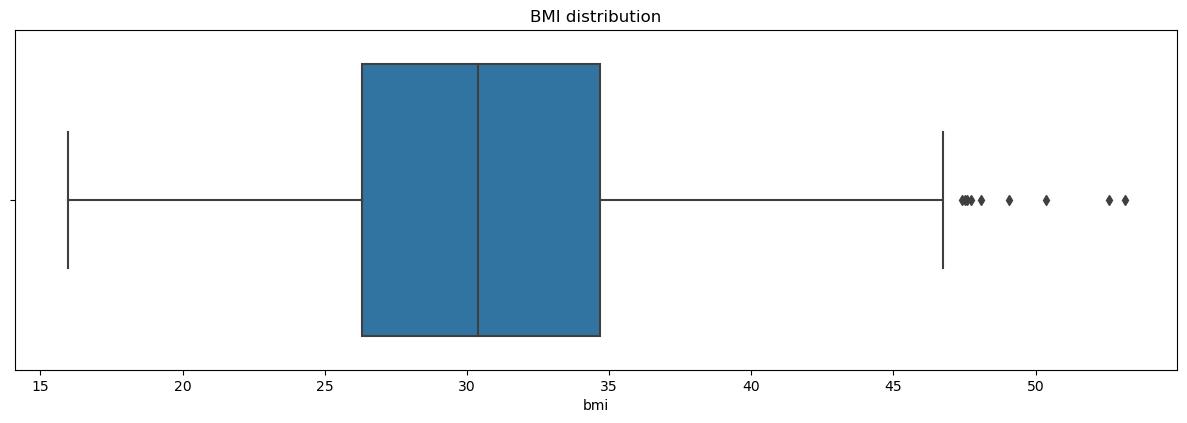

In [21]:
plt.figure(figsize= (15,15))
plt.subplot(3,1,1)
plt.title("BMI distribution");
sns.boxplot(x=df['bmi']);
plt.show();

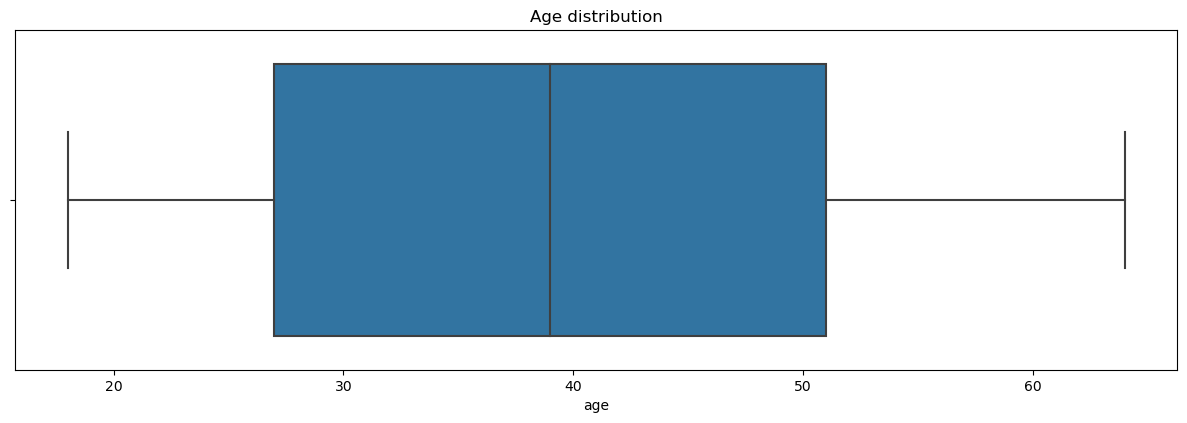

In [22]:
plt.figure(figsize= (15,15))
plt.subplot(3,1,1)
plt.title("Age distribution");
sns.boxplot(x=df['age']);
plt.show();

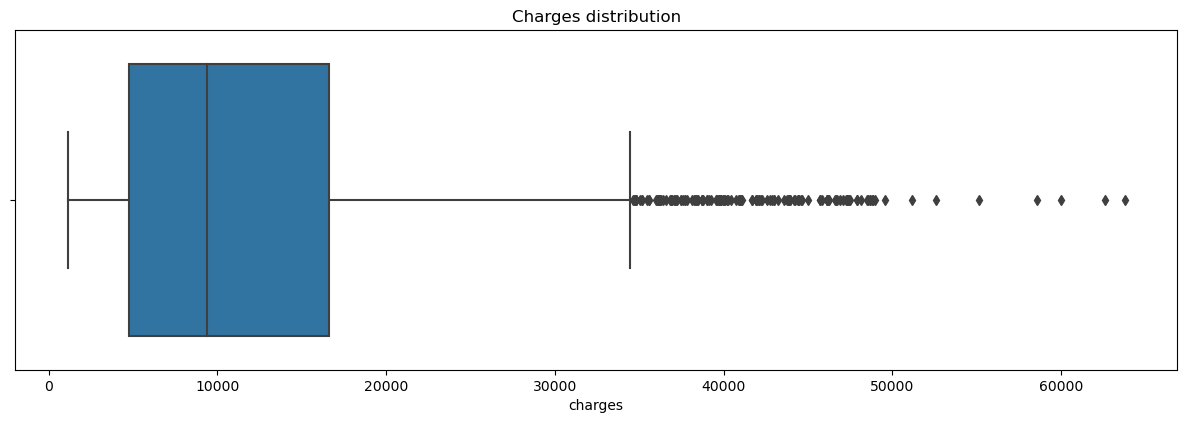

In [23]:
plt.figure(figsize= (15,15))
plt.subplot(3,1,1)
plt.title("Charges distribution");
sns.boxplot(x=df['charges']);
plt.show();

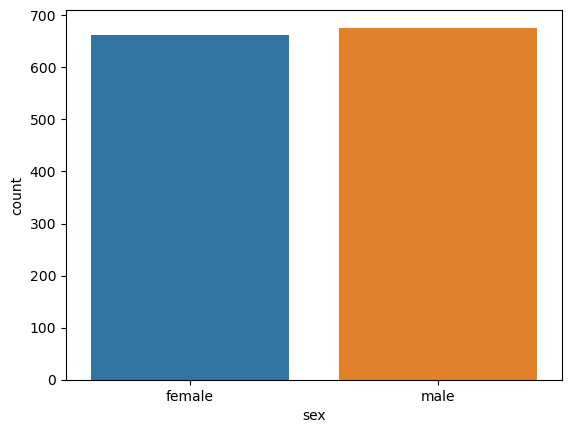

In [24]:

sns.countplot(data = df
            ,x = 'sex'
            )
plt.show();

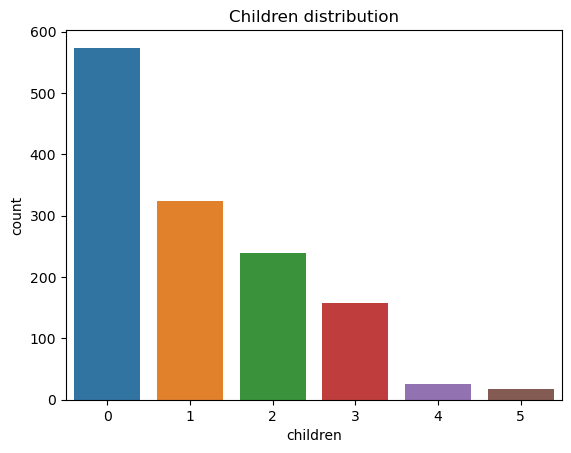

In [25]:
sns.countplot(data= df, x= 'children');
plt.title("Children distribution");
plt.show();

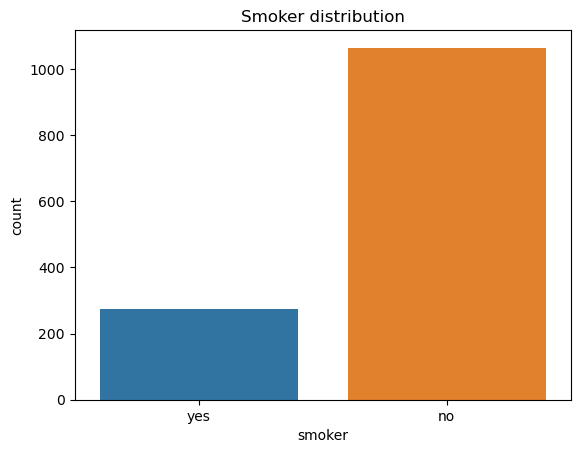

In [26]:


sns.countplot(data = df, x = 'smoker');
plt.title("Smoker distribution");
plt.show();



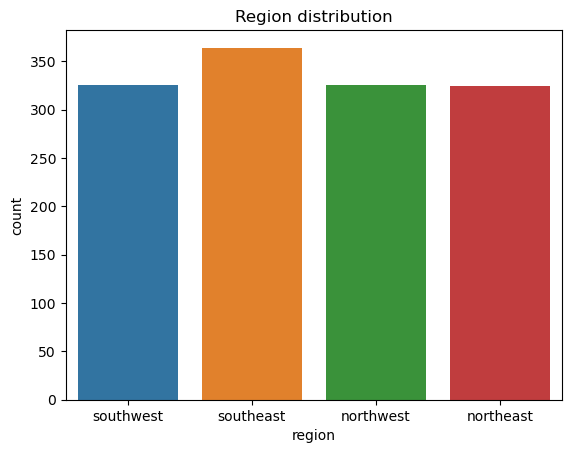

In [27]:


sns.countplot(data = df, x= 'region');
plt.title("Region distribution");
plt.show();



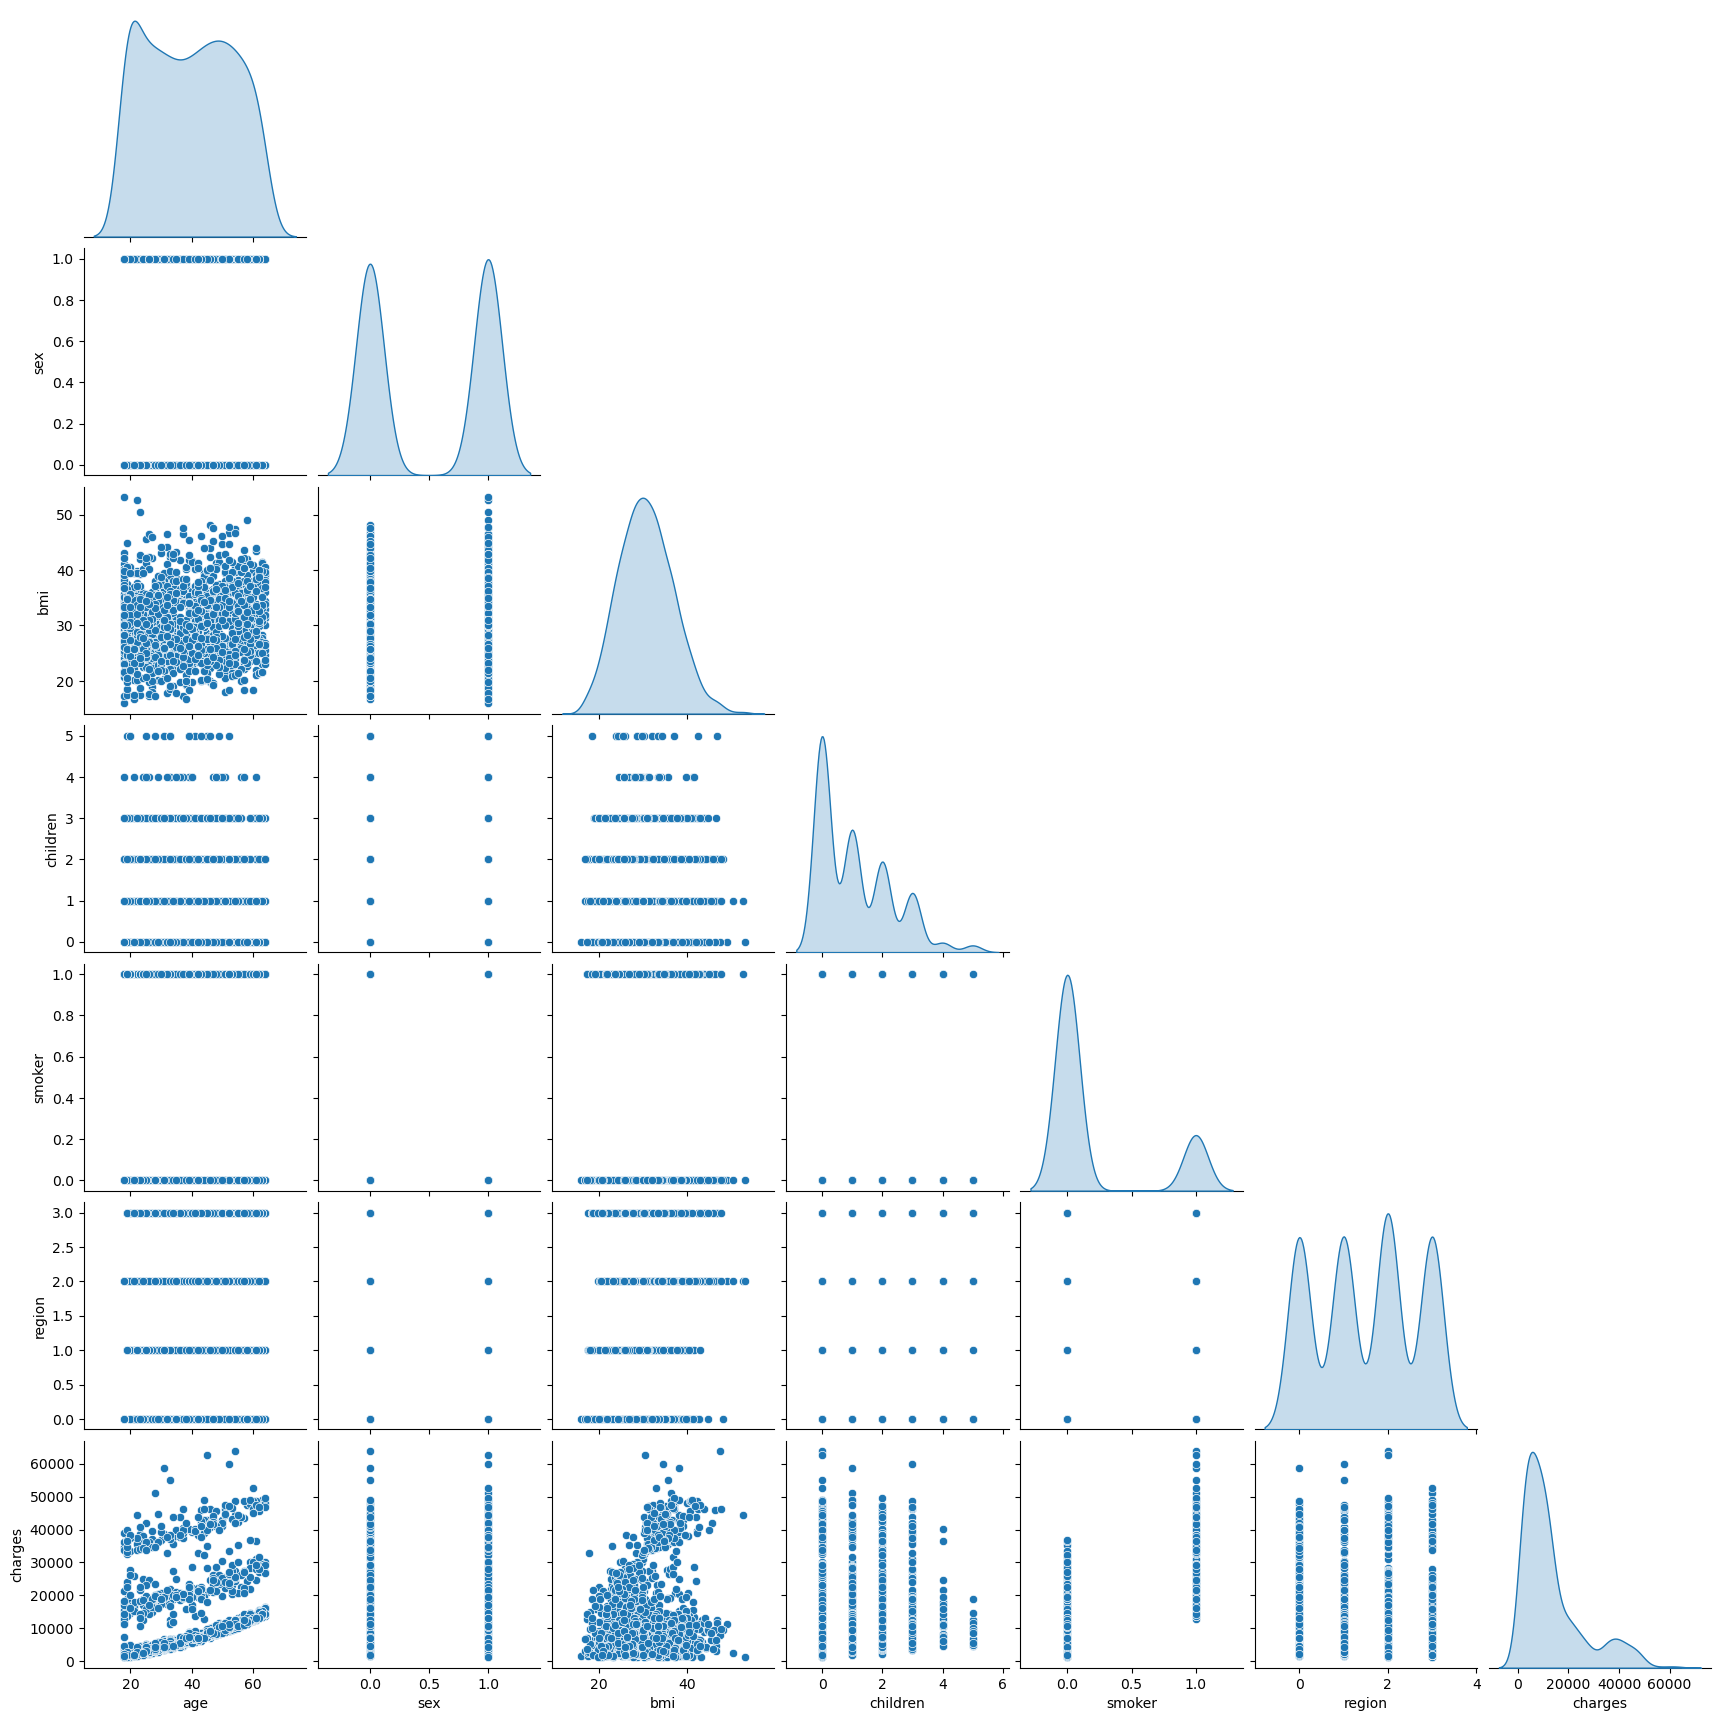

In [28]:
df_encoded = copy.deepcopy(df)
df_encoded.loc[:,['sex', 'smoker', 'region']] = df_encoded.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 

sns.pairplot(df_encoded, diag_kind ="kde", corner = True)
plt.show()

In [29]:
# Checking howmany smokers and non-smokers in Insurance Data frame
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

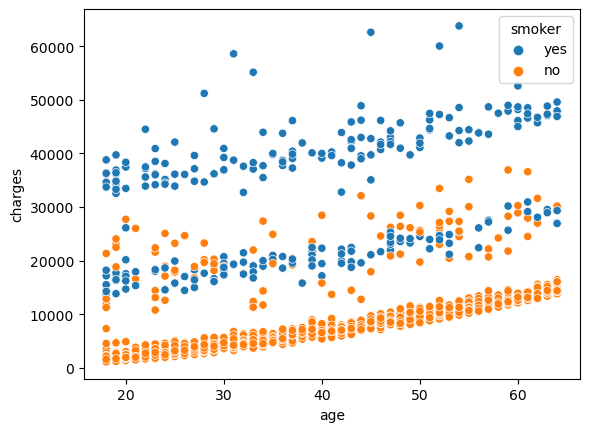

In [30]:
# Check the charges of smokers and non-smokers across different ages
sns.scatterplot(x = 'age', y = 'charges', hue = 'smoker', data = df);

In [31]:


smoker_charges = df[df['smoker'] == 'yes'].charges
non_smoker_charges = df[df['smoker'] == 'no'].charges

t_statistic, p_value = ttest_ind(smoker_charges, non_smoker_charges)


print("t_statistic =",t_statistic)
print("p_value =",p_value)



t_statistic = 46.66492117272371
p_value = 8.271435842179102e-283


In [32]:
reject_null = False
if p_value < 0.05:
    reject_null = True 
else: 
    reject_null = False
    
print("reject null? : " + str(reject_null))

reject null? : True
